In [12]:
import requests
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kyana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kyana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\kyana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\kyana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [2]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

def load_texts(urls):
    corpus = []
    for url in urls:
        response = requests.get(url)
        text = response.text

        # Extract relevant parts of the text
        start_idx = text.find('START')
        end_idx = text.find('*** END')
        if start_idx != -1 and end_idx != -1:
            text = text[start_idx:end_idx]

        # Clean the text
        text = re.sub(r'[^A-Za-z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()

        corpus.append(text)
        print(f"First 200 characters of text from {url}:\n{text[:200]}\n")

    return corpus

In [4]:
# URLs of the texts
urls = [
    "https://www.gutenberg.org/cache/epub/11/pg11.txt",
    "https://www.gutenberg.org/cache/epub/12/pg12.txt",
    "https://www.gutenberg.org/cache/epub/29042/pg29042.txt"
]

# Load and clean the texts
corpus = load_texts(urls)

First 200 characters of text from https://www.gutenberg.org/cache/epub/11/pg11.txt:
START OF THE PROJECT GUTENBERG EBOOK ALICES ADVENTURES IN WONDERLAND Illustration Alices Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION Contents CHAPTER I Down the RabbitHole

First 200 characters of text from https://www.gutenberg.org/cache/epub/12/pg12.txt:
START OF THE PROJECT GUTENBERG EBOOK THROUGH THE LOOKINGGLASS Illustration THROUGH THE LOOKINGGLASS And What Alice Found There By Lewis Carroll The Millennium Fulcrum Edition DRAMATIS PERSON As arrang

First 200 characters of text from https://www.gutenberg.org/cache/epub/29042/pg29042.txt:
START OF THE PROJECT GUTENBERG EBOOK A TANGLED TALE Produced by Chris Curnow Carla Foust Lindy Walsh and the Online Distributed Proofreading Team at httpswwwpgdpnet Music transcribed by Linda Cantoni 



In [5]:
# Tokenize the texts and print the first 150 tokens of each book
for i, text in enumerate(corpus):
    tokens = word_tokenize(text)
    print(f"First 150 tokens of book {i+1}:\n{tokens[:150]}\n")

First 150 tokens of book 1:
['START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'ALICES', 'ADVENTURES', 'IN', 'WONDERLAND', 'Illustration', 'Alices', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'Contents', 'CHAPTER', 'I', 'Down', 'the', 'RabbitHole', 'CHAPTER', 'II', 'The', 'Pool', 'of', 'Tears', 'CHAPTER', 'III', 'A', 'CaucusRace', 'and', 'a', 'Long', 'Tale', 'CHAPTER', 'IV', 'The', 'Rabbit', 'Sends', 'in', 'a', 'Little', 'Bill', 'CHAPTER', 'V', 'Advice', 'from', 'a', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'and', 'Pepper', 'CHAPTER', 'VII', 'A', 'Mad', 'TeaParty', 'CHAPTER', 'VIII', 'The', 'Queens', 'CroquetGround', 'CHAPTER', 'IX', 'The', 'Mock', 'Turtles', 'Story', 'CHAPTER', 'X', 'The', 'Lobster', 'Quadrille', 'CHAPTER', 'XI', 'Who', 'Stole', 'the', 'Tarts', 'CHAPTER', 'XII', 'Alices', 'Evidence', 'CHAPTER', 'I', 'Down', 'the', 'RabbitHole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by

In [6]:
# Remove stopwords using NLTK
stop_words = set(stopwords.words('english'))
filtered_texts = []
for i, text in enumerate(corpus):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    filtered_texts.append(' '.join(filtered_tokens))
    print(f"Sample filtered tokens from book {i+1} (checking stopword removal):\n{filtered_tokens[:150]}\n")

Sample filtered tokens from book 1 (checking stopword removal):
['START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'ALICES', 'ADVENTURES', 'WONDERLAND', 'Illustration', 'Alices', 'Adventures', 'Wonderland', 'Lewis', 'Carroll', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'Contents', 'CHAPTER', 'RabbitHole', 'CHAPTER', 'II', 'Pool', 'Tears', 'CHAPTER', 'III', 'CaucusRace', 'Long', 'Tale', 'CHAPTER', 'IV', 'Rabbit', 'Sends', 'Little', 'Bill', 'CHAPTER', 'V', 'Advice', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'Pepper', 'CHAPTER', 'VII', 'Mad', 'TeaParty', 'CHAPTER', 'VIII', 'Queens', 'CroquetGround', 'CHAPTER', 'IX', 'Mock', 'Turtles', 'Story', 'CHAPTER', 'X', 'Lobster', 'Quadrille', 'CHAPTER', 'XI', 'Stole', 'Tarts', 'CHAPTER', 'XII', 'Alices', 'Evidence', 'CHAPTER', 'RabbitHole', 'Alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thought', 'Alice', 'without', 'pictures', 'conversations',

In [7]:
# Perform stemming using PorterStemmer
ps = PorterStemmer()
stemmed_texts = []
for text in filtered_texts:
    tokens = word_tokenize(text)
    stemmed_tokens = [ps.stem(word) for word in tokens]
    stemmed_texts.append(' '.join(stemmed_tokens))
    print(f"First 50 stemmed tokens:\n{stemmed_tokens[:50]}\n")

First 50 stemmed tokens:
['start', 'project', 'gutenberg', 'ebook', 'alic', 'adventur', 'wonderland', 'illustr', 'alic', 'adventur', 'wonderland', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'content', 'chapter', 'rabbithol', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucusrac', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'littl', 'bill', 'chapter', 'v', 'advic', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparti', 'chapter', 'viii', 'queen', 'croquetground']

First 50 stemmed tokens:
['start', 'project', 'gutenberg', 'ebook', 'lookingglass', 'illustr', 'lookingglass', 'alic', 'found', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'dramati', 'person', 'arrang', 'commenc', 'game', 'white', 'red', 'piec', 'pawn', 'pawn', 'piec', 'tweedlede', 'daisi', 'daisi', 'humpti', 'dumpti', 'unicorn', 'haigha', 'messeng', 'carpent', 'sheep', 'oyster', 'oyster', 'walru', 'w', 'queen', 'lili', 'tigerlili', 'r', 'queen', 'w', 'king', 'fawn',

In [8]:
# Perform lemmatization using spaCy
lemmatized_texts = []
for text in filtered_texts:
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    lemmatized_texts.append(' '.join(lemmatized_tokens))
    print(f"First 50 lemmatized tokens:\n{lemmatized_tokens[:50]}\n")

First 50 lemmatized tokens:
['START', 'PROJECT', 'GUTENBERG', 'ebook', 'ALICES', 'ADVENTURES', 'WONDERLAND', 'Illustration', 'Alices', 'Adventures', 'Wonderland', 'Lewis', 'Carroll', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'Contents', 'CHAPTER', 'RabbitHole', 'chapter', 'II', 'Pool', 'Tears', 'CHAPTER', 'III', 'CaucusRace', 'Long', 'Tale', 'chapter', 'IV', 'Rabbit', 'send', 'Little', 'Bill', 'chapter', 'V', 'Advice', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'Pepper', 'chapter', 'VII', 'Mad', 'TeaParty', 'chapter', 'VIII', 'Queens', 'CroquetGround']

First 50 lemmatized tokens:
['START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'LOOKINGGLASS', 'Illustration', 'LOOKINGGLASS', 'Alice', 'find', 'Lewis', 'Carroll', 'Millennium', 'Fulcrum', 'Edition', 'DRAMATIS', 'person', 'arrange', 'commencement', 'game', 'WHITE', 'RED', 'PIECES', 'pawns', 'pawn', 'piece', 'Tweedledee', 'Daisy', 'Daisy', 'Humpty', 'Dumpty', 'Unicorn', 'Haigha', 'Messenger', 'Carpenter', 'Sheep', 'Oyster', 'Oyster', 'Walrus', 'W', 'Queen

In [9]:
# Analyze the difference between stemmed and lemmatized tokens
# Here, we'll simply compare the first 50 tokens for analysis
print("Comparison of stemmed and lemmatized tokens (first 50 tokens):")
print(f"Stemmed tokens: {stemmed_tokens[:50]}")
print(f"Lemmatized tokens: {lemmatized_tokens[:50]}")

Comparison of stemmed and lemmatized tokens (first 50 tokens):
Stemmed tokens: ['start', 'project', 'gutenberg', 'ebook', 'tangl', 'tale', 'produc', 'chri', 'curnow', 'carla', 'foust', 'lindi', 'walsh', 'onlin', 'distribut', 'proofread', 'team', 'httpswwwpgdpnet', 'music', 'transcrib', 'linda', 'cantoni', 'transcrib', 'note', 'minor', 'punctuat', 'error', 'chang', 'without', 'notic', 'printer', 'error', 'chang', 'list', 'end', 'inconsist', 'origin', 'version', 'squar', 'root', 'symbol', 'indic', 'sqrt', 'superscript', 'therefor', 'symbol', 'therefor', 'tangl', 'tale', 'decor']
Lemmatized tokens: ['START', 'PROJECT', 'GUTENBERG', 'ebook', 'tangle', 'TALE', 'Produced', 'Chris', 'Curnow', 'Carla', 'Foust', 'Lindy', 'Walsh', 'Online', 'distribute', 'Proofreading', 'Team', 'httpswwwpgdpnet', 'Music', 'transcribe', 'Linda', 'Cantoni', 'Transcribers', 'note', 'minor', 'punctuation', 'error', 'change', 'without', 'notice', 'Printer', 'error', 'change', 'list', 'end', 'inconsistency', 'original

In [10]:
# Identify POS tags using NLTK
for i, text in enumerate(filtered_texts):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    print(f"Sample POS tags from book {i+1}:\n{pos_tags[:50]}\n")

Sample POS tags from book 1:
[('START', 'NNP'), ('PROJECT', 'NNP'), ('GUTENBERG', 'NNP'), ('EBOOK', 'NNP'), ('ALICES', 'NNP'), ('ADVENTURES', 'NNP'), ('WONDERLAND', 'NNP'), ('Illustration', 'NNP'), ('Alices', 'NNP'), ('Adventures', 'NNP'), ('Wonderland', 'NNP'), ('Lewis', 'NNP'), ('Carroll', 'NNP'), ('MILLENNIUM', 'NNP'), ('FULCRUM', 'NNP'), ('EDITION', 'NNP'), ('Contents', 'NNP'), ('CHAPTER', 'NNP'), ('RabbitHole', 'NNP'), ('CHAPTER', 'NNP'), ('II', 'NNP'), ('Pool', 'NNP'), ('Tears', 'NNP'), ('CHAPTER', 'NNP'), ('III', 'NNP'), ('CaucusRace', 'NNP'), ('Long', 'NNP'), ('Tale', 'NNP'), ('CHAPTER', 'NNP'), ('IV', 'NNP'), ('Rabbit', 'NNP'), ('Sends', 'NNP'), ('Little', 'NNP'), ('Bill', 'NNP'), ('CHAPTER', 'NNP'), ('V', 'NNP'), ('Advice', 'NNP'), ('Caterpillar', 'NNP'), ('CHAPTER', 'NNP'), ('VI', 'NNP'), ('Pig', 'NNP'), ('Pepper', 'NNP'), ('CHAPTER', 'NNP'), ('VII', 'NNP'), ('Mad', 'NNP'), ('TeaParty', 'NNP'), ('CHAPTER', 'NNP'), ('VIII', 'NNP'), ('Queens', 'NNP'), ('CroquetGround', 'NNP')]

In [13]:
# Identify named entities using NLTK
for i, text in enumerate(filtered_texts):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    chunks = nltk.ne_chunk(pos_tags)
    entities = [chunk for chunk in chunks if hasattr(chunk, 'label')]
    print(f"Sample named entities from book {i+1}:\n{entities[:50]}\n")

Sample named entities from book 1:
[Tree('ORGANIZATION', [('ADVENTURES', 'NNP')]), Tree('ORGANIZATION', [('WONDERLAND', 'NNP'), ('Illustration', 'NNP'), ('Alices', 'NNP'), ('Adventures', 'NNP'), ('Wonderland', 'NNP')]), Tree('PERSON', [('Lewis', 'NNP'), ('Carroll', 'NNP')]), Tree('ORGANIZATION', [('RabbitHole', 'NNP')]), Tree('PERSON', [('Rabbit', 'NNP'), ('Sends', 'NNP'), ('Little', 'NNP')]), Tree('PERSON', [('Bill', 'NNP')]), Tree('PERSON', [('Pepper', 'NNP')]), Tree('PERSON', [('Turtles', 'NNP'), ('Story', 'NNP')]), Tree('ORGANIZATION', [('RabbitHole', 'NNP')]), Tree('FACILITY', [('White', 'NNP'), ('Rabbit', 'NNP')]), Tree('PERSON', [('Rabbit', 'NNP')]), Tree('ORGANIZATION', [('ORANGE', 'NNP')]), Tree('PERSON', [('Well', 'NNP')]), Tree('PERSON', [('Latitude', 'NNP'), ('Longitude', 'NNP'), ('Ive', 'NNP')]), Tree('PERSON', [('Latitude', 'NNP'), ('Longitude', 'NNP')]), Tree('PERSON', [('Please', 'NNP'), ('Maam', 'NNP'), ('New', 'NNP'), ('Zealand', 'NNP'), ('Australia', 'NNP')]), Tree('

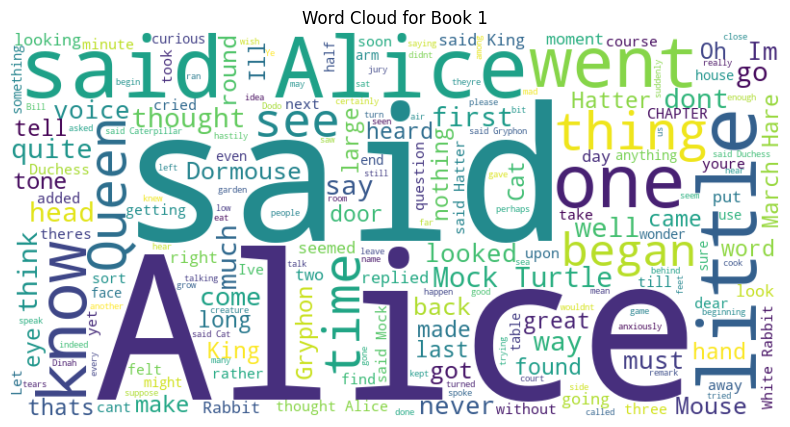

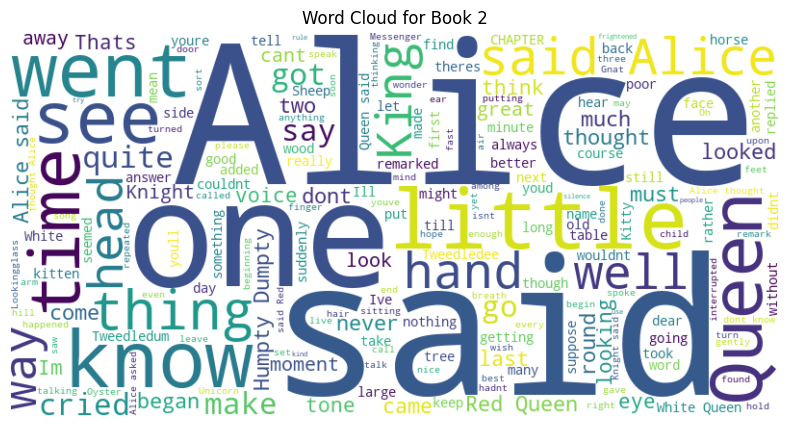

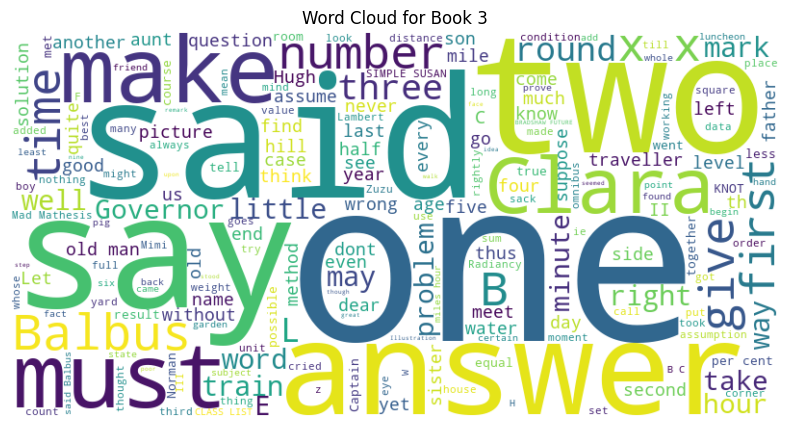

In [14]:
# Generate and display word clouds for each book
for i, text in enumerate(filtered_texts):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Book {i+1}")
    plt.show()

In [15]:
# Bag of Words (BoW) method to check the five most frequent words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(filtered_texts)
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
word_freq = dict(zip(words, word_counts))
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

In [16]:
print("Top 5 most frequent words across all books:")
for word, freq in list(sorted_word_freq.items())[:5]:
    print(f"{word}: {freq}")

Top 5 most frequent words across all books:
said: 1065
alice: 829
one: 434
little: 293
queen: 251


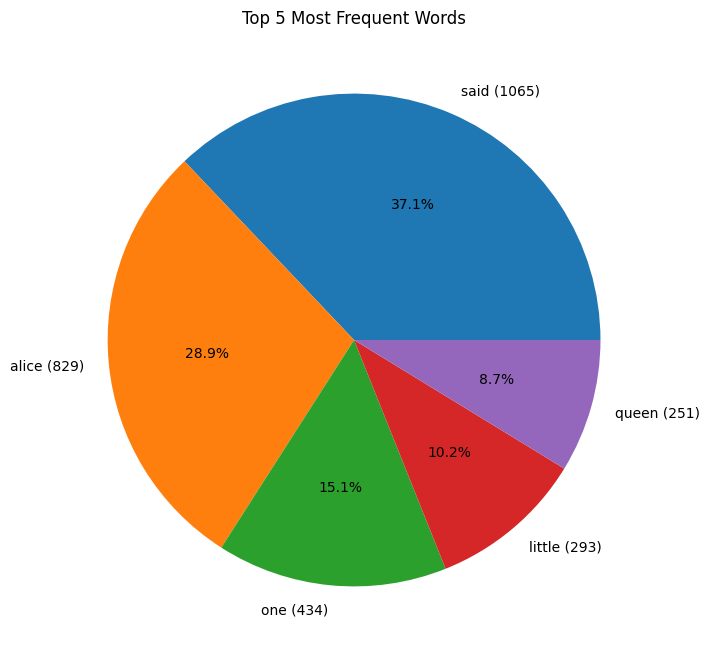

In [18]:
# Display a pie plot of the 5 most frequent words in the text
top_words = list(sorted_word_freq.keys())[:5]
top_counts = list(sorted_word_freq.values())[:5]

plt.figure(figsize=(8, 8))
plt.pie(top_counts, labels=[f"{word} ({count})" for word, count in zip(top_words, top_counts)], autopct='%1.1f%%')
plt.title("Top 5 Most Frequent Words")
plt.show()

In [19]:
# Create another BoW using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=2)
X_tfidf = tfidf_vectorizer.fit_transform(filtered_texts)
tfidf_word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_words = tfidf_vectorizer.get_feature_names_out()
tfidf_word_freq = dict(zip(tfidf_words, tfidf_word_scores))
sorted_tfidf_word_freq = dict(sorted(tfidf_word_freq.items(), key=lambda item: item[1], reverse=True))

print("Top 5 most relevant words using TF-IDF across all books:")
for word, score in list(sorted_tfidf_word_freq.items())[:5]:
    print(f"{word}: {score}")

Top 5 most relevant words using TF-IDF across all books:
humpty: 0.3555221087258887
dumpty: 0.3491734996414978
gryphon: 0.3388961503622255
balbus: 0.30418705208115826
knight: 0.2975662053103136


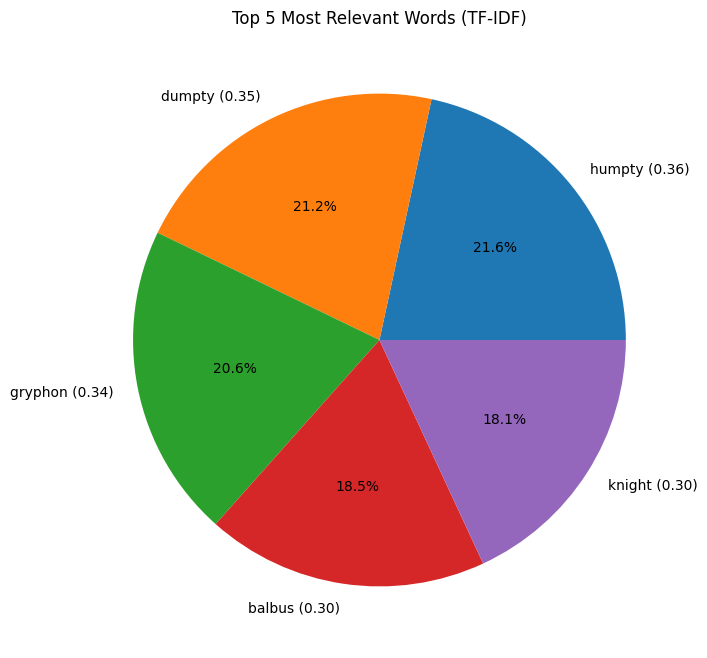

In [20]:
# Display a pie plot of the 5 most relevant words in the text using TF-IDF
top_tfidf_words = list(sorted_tfidf_word_freq.keys())[:5]
top_tfidf_scores = list(sorted_tfidf_word_freq.values())[:5]

plt.figure(figsize=(8, 8))
plt.pie(top_tfidf_scores, labels=[f"{word} ({score:.2f})" for word, score in zip(top_tfidf_words, top_tfidf_scores)], autopct='%1.1f%%')
plt.title("Top 5 Most Relevant Words (TF-IDF)")
plt.show()